# Bank Note Authentication - Binary Classification

About the data:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

The dataset was downloaded from Kaggle(https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data).



## Importing the required libraries

In [34]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

import seaborn as sns

import pickle

### Loading the dataset

In [3]:
data = pd.read_csv("BankNote_Authentication.csv")
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### Analysing the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


**The data doesn't have any null values.**

In [5]:
print(f"The dataset has {data.shape[0]} rows and {data.shape[-1]} columns")

The dataset has 1372 rows and 5 columns


**The unique values present in the column 'class'.**

In [7]:
data['class'].unique()

array([0, 1], dtype=int64)

**Checking whether the dataset is balanced or imbalanced.**

In [11]:
print(f"The 'class 0' has {data['class'].value_counts()[0]} samples")
print(f"The 'class 1' has {data['class'].value_counts()[1]} samples")

The 'class 0' has 762 samples
The 'class 1' has 610 samples


**The dataset is a balanced dataset.**

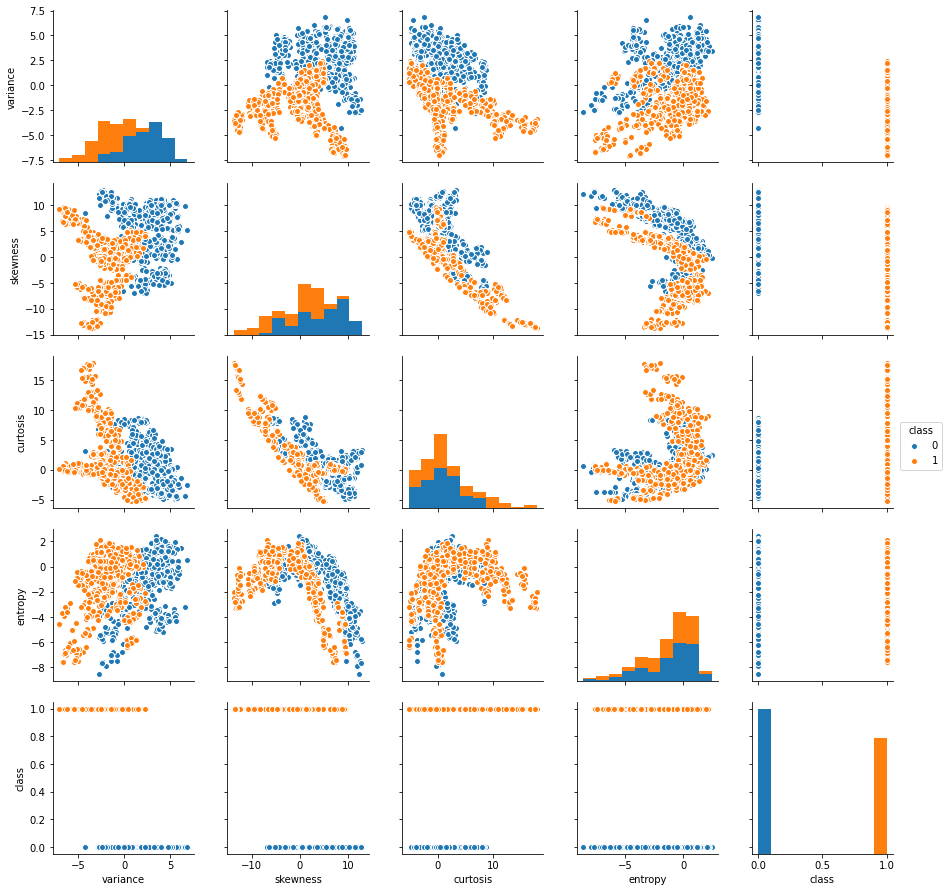

In [16]:
sns.pairplot(data, hue = 'class')

**From the above pairplot it can be clearly seen that the data are seperable.**

**Shuffiling the dataset before splitting it into Independent and Dependent variable because the label '0' is present in the first half of the dataset and the label '1' is present in the second half of the dataset. Shuffiling the data helps in balancing the labels equally present in the dataset. This helps in training and testing the Model.**

In [22]:
#Shuffiling the dataset 
data1 = data.sample(frac =1).reset_index(drop = True)
data1

,variance,skewness,curtosis,entropy,class
0,-2.32210,-9.330400,9.23300,-0.79871,1
1,-1.75490,-0.080711,-0.75774,-0.37070,1
2,2.59890,3.517800,0.76230,0.81119,0
3,3.18960,5.752600,-0.18537,-0.30087,0
4,0.37984,0.709750,0.75716,-0.44441,0
...,...,...,...,...,...
1367,-1.97250,2.882500,-2.30860,-2.37240,1
1368,-1.50550,0.070346,6.86810,-0.50648,0
1369,4.07150,7.639800,-2.08240,-1.16980,0
1370,-0.10234,1.818900,-2.21690,-0.56725,1


In [23]:
X = data1.drop(['class'], axis = 'columns')
y = data1['class']

print("The shape of the Independent variable 'X' is : ", X.shape)
print("The shape of the Dependent variable 'y' is : ",y.shape)

The shape of the Independent variable 'X' is :  (1372, 4)
The shape of the Dependent variable 'y' is :  (1372,)


## Splitting the data into training and testing

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print("The shape of X_train : ", X_train.shape)
print("The shape of y_train : ", y_train.shape)
print("The shape of X_test : ", X_test.shape)
print("The shape of y_test : ", y_test.shape)

The shape of X_train :  (1097, 4)
The shape of y_train :  (1097,)
The shape of X_test :  (275, 4)
The shape of y_test :  (275,)


## Model Training using RandomForest Classifier

In [29]:
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

### Accuracy score 

In [36]:
classifier.score(X_train,y_train)

1.0

In [31]:
classifier.score(X_test,y_test)

0.9927272727272727

### Plotting the Confusion Matrix

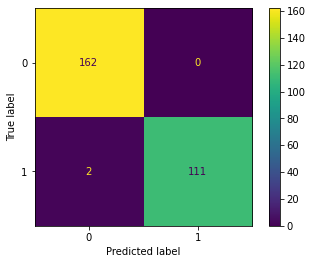

In [33]:
plot_confusion_matrix(classifier, X_test,y_test)

**From the above confusion matrix 162 samples of class '0' is classified as correctly and out of 113 samples of class '1' 2 samples are wrongly classified as class '0' by the Model.** 

### Creating a Pickle file

In [35]:
pickle_out = open("classifier.pkl", "wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

## Postman Collections

**Below are the screenshots from Postman Collections that explains the request predict_note_authentication using the 'GET' method and the responses are class '0' and '1'.**

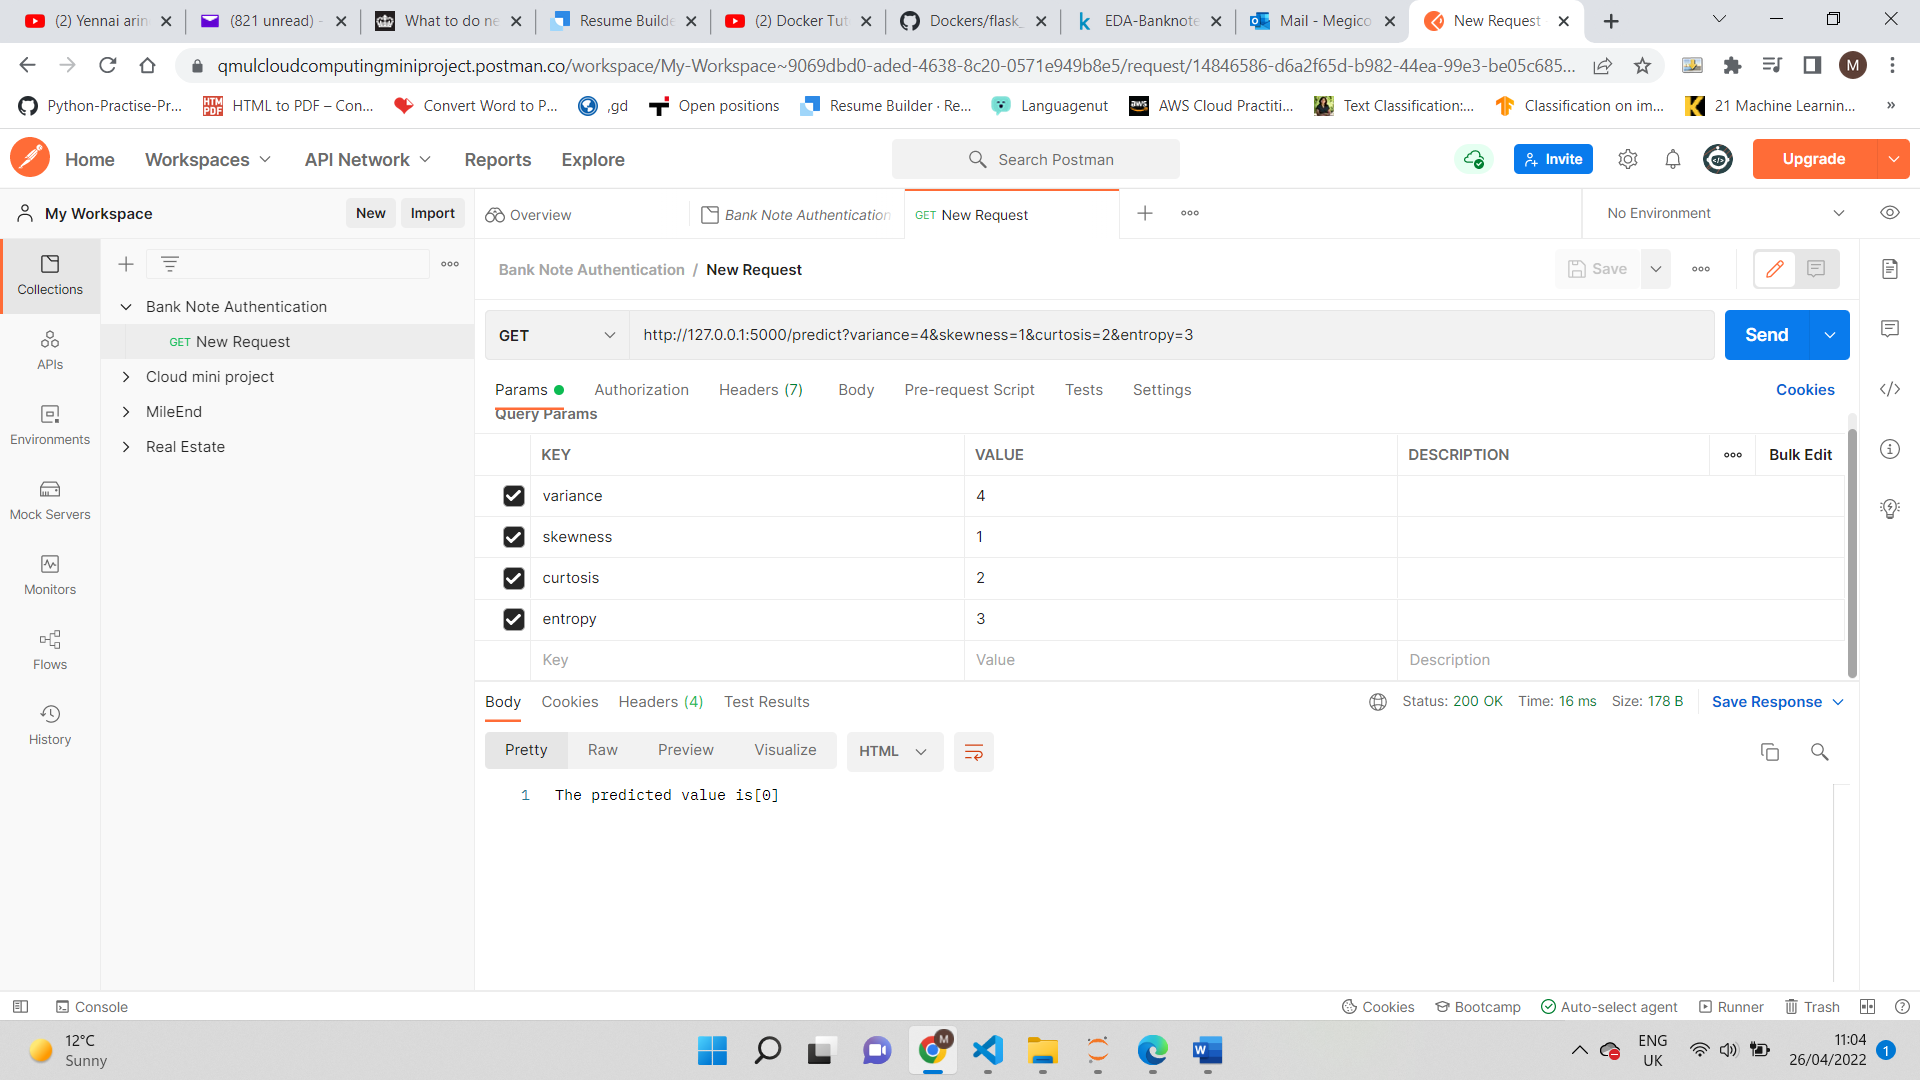

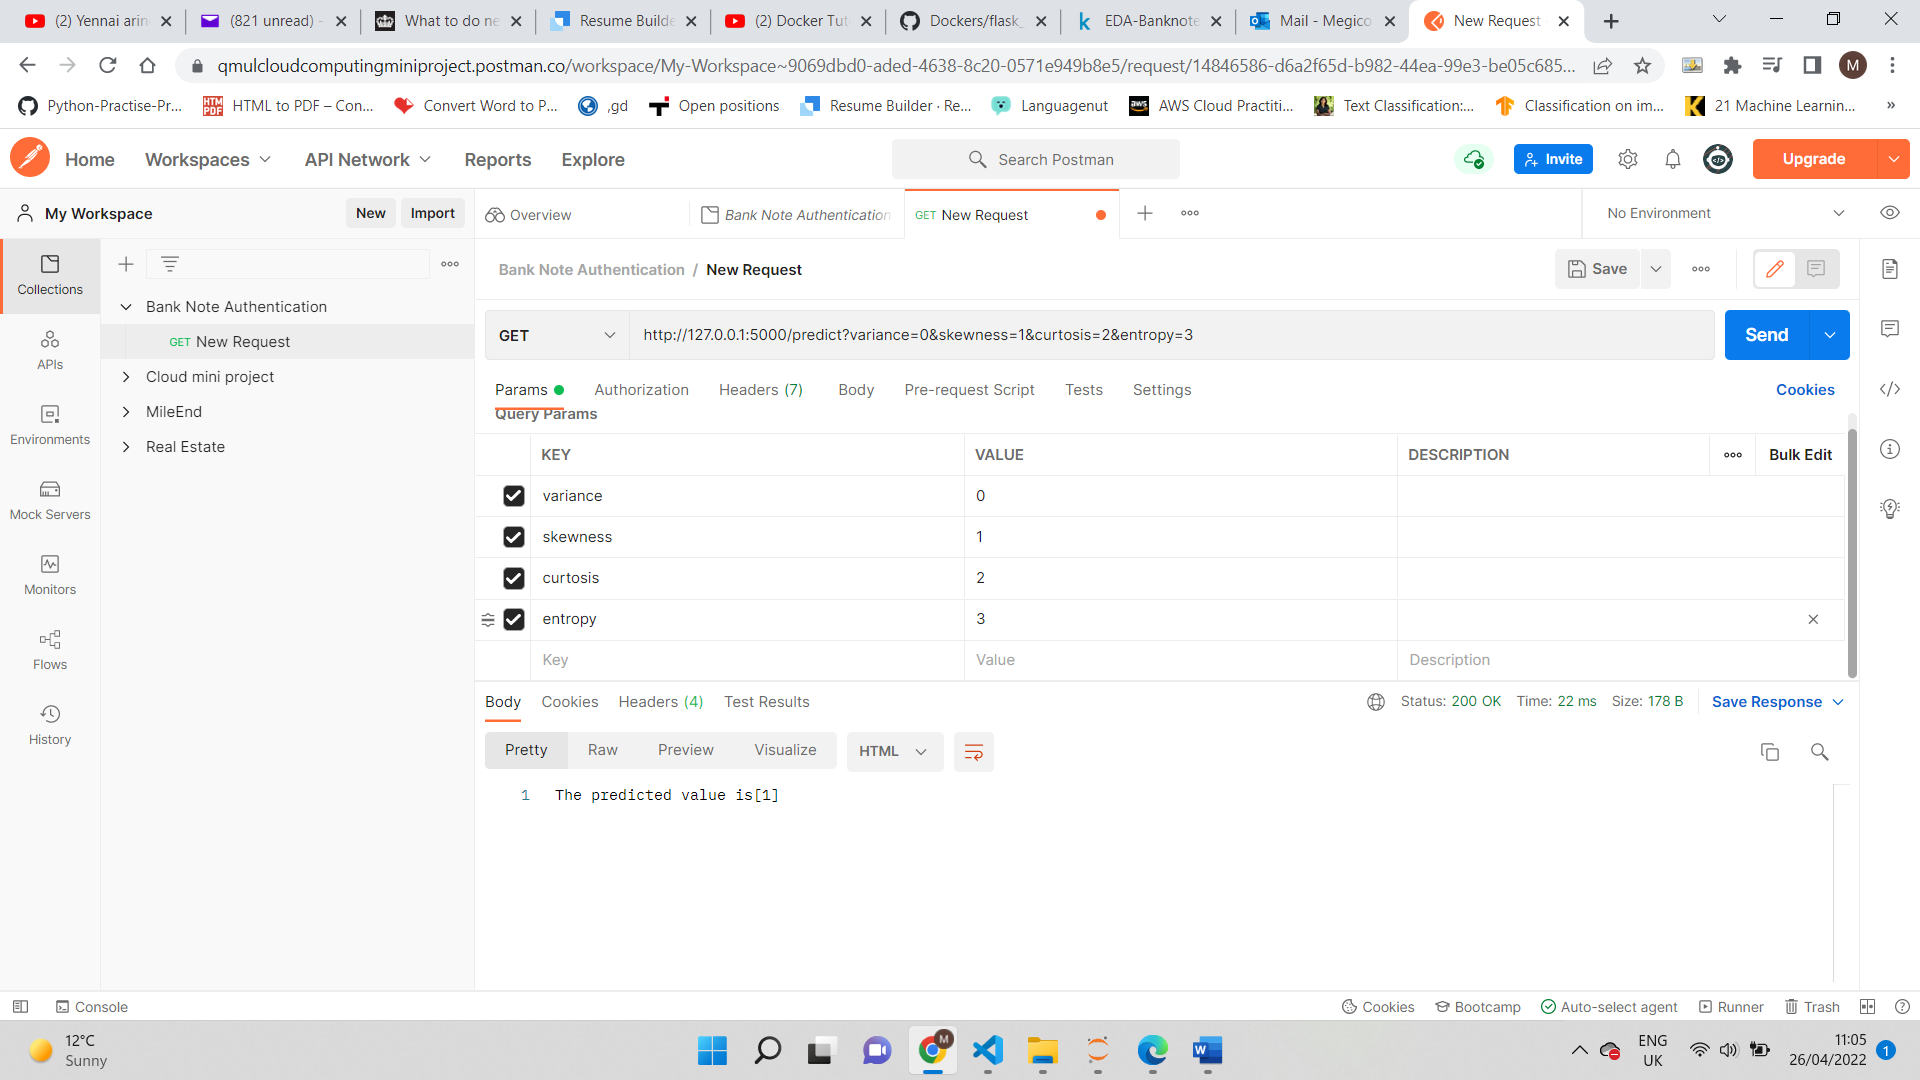

## Web App UI for Bank Note Aunthentication using Flasgger Swagger API running locally.

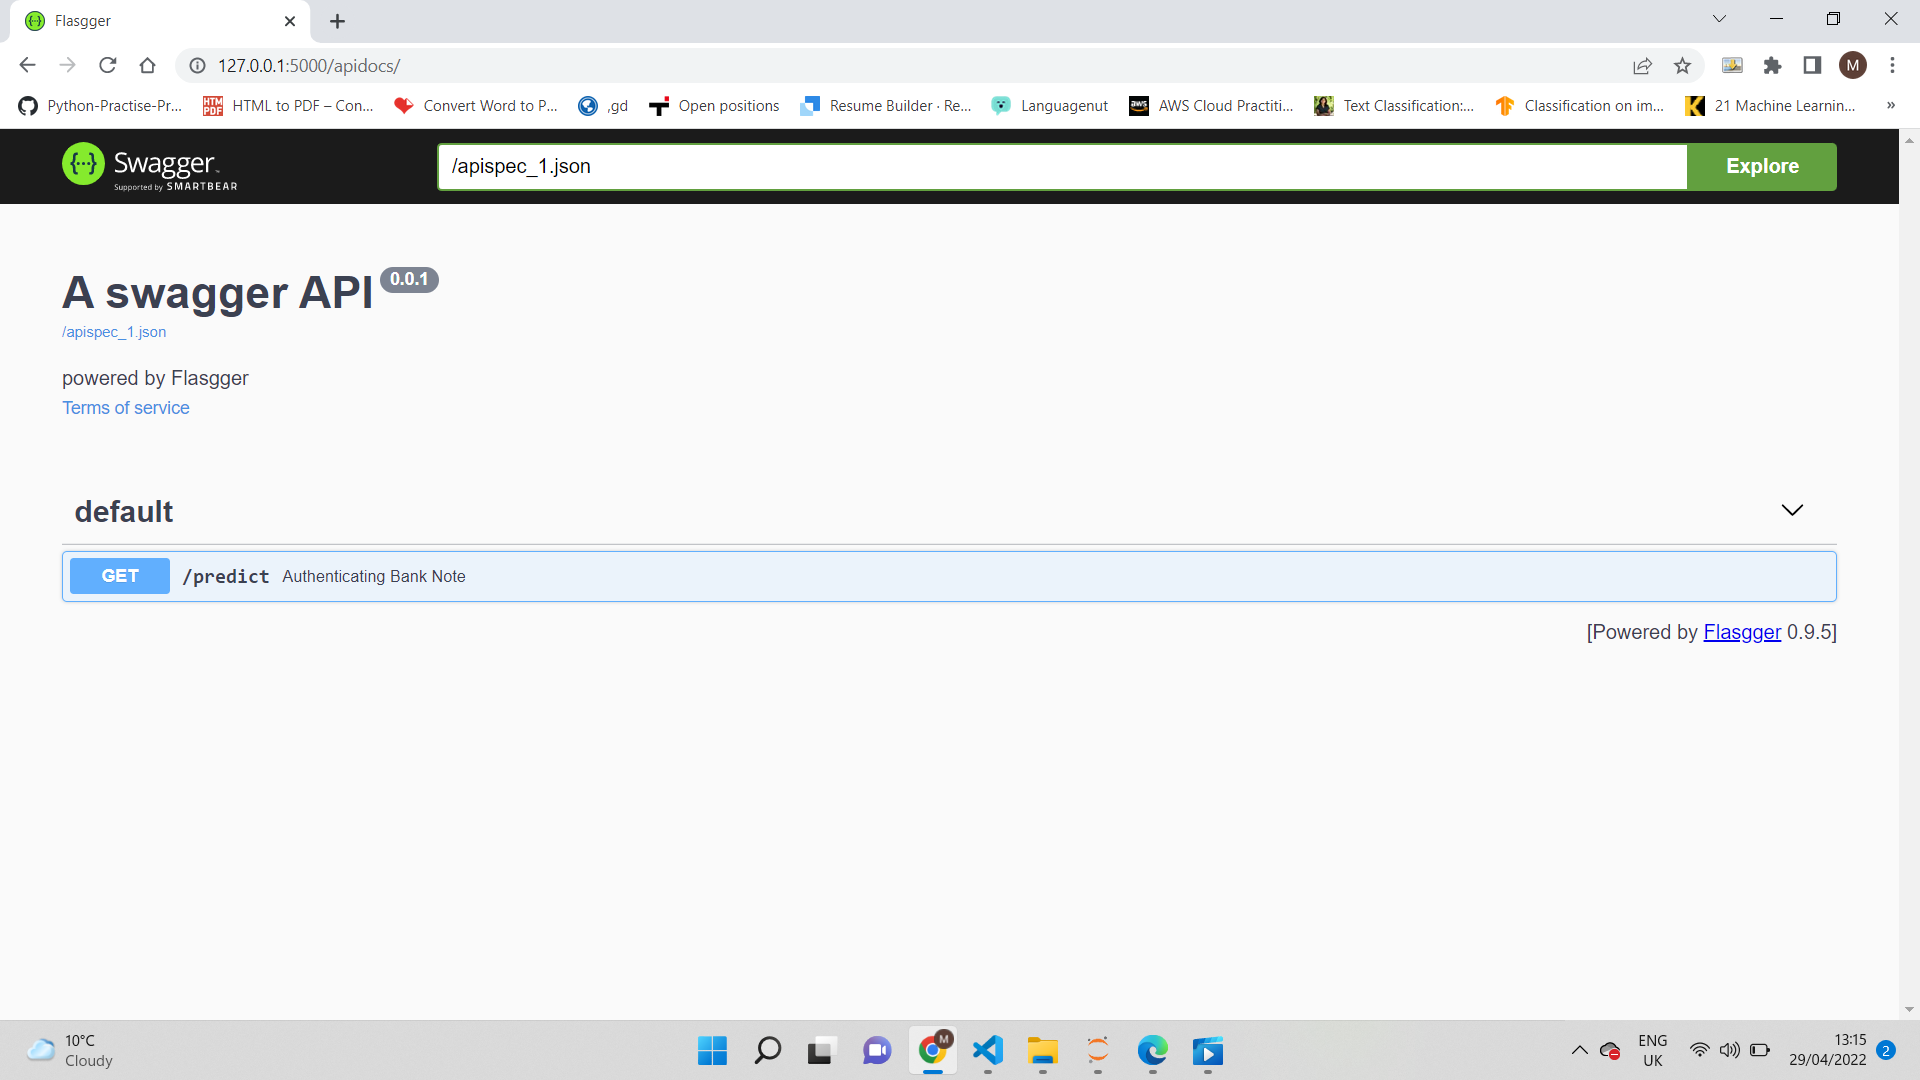

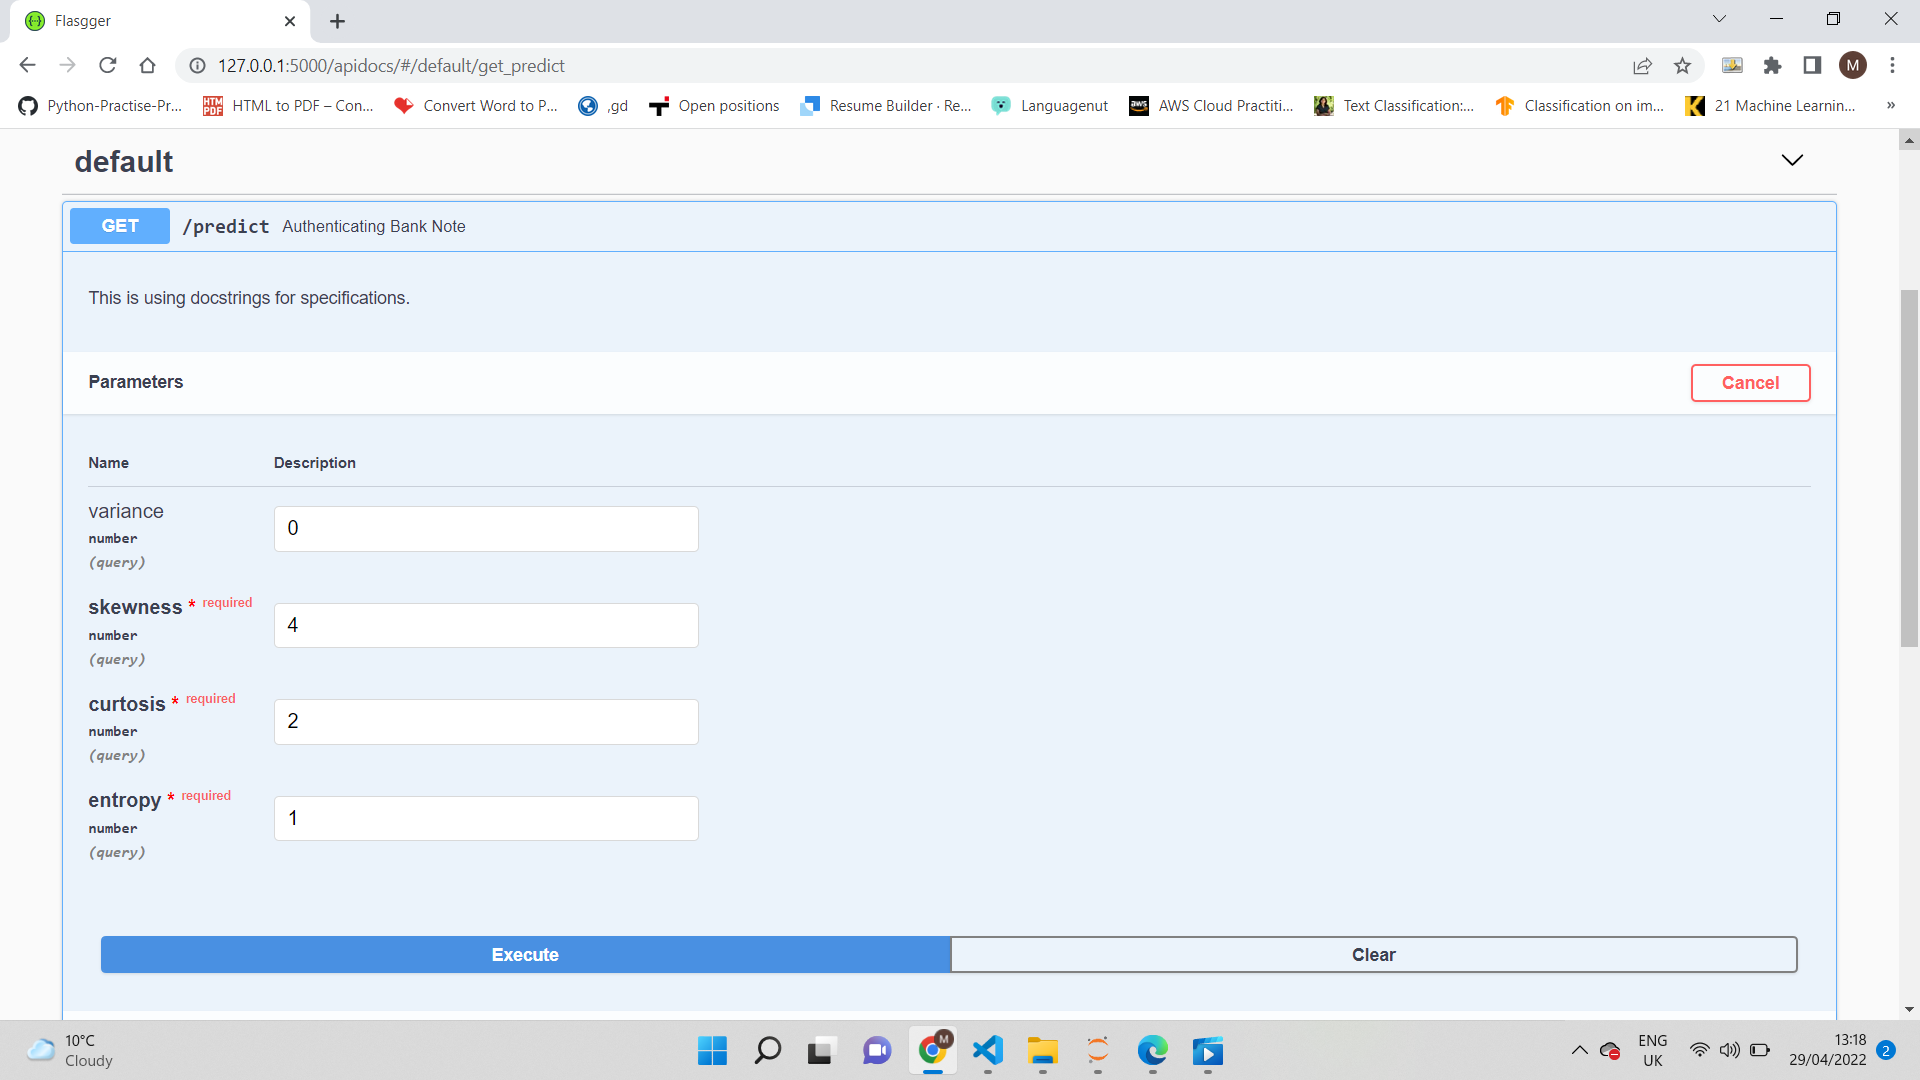

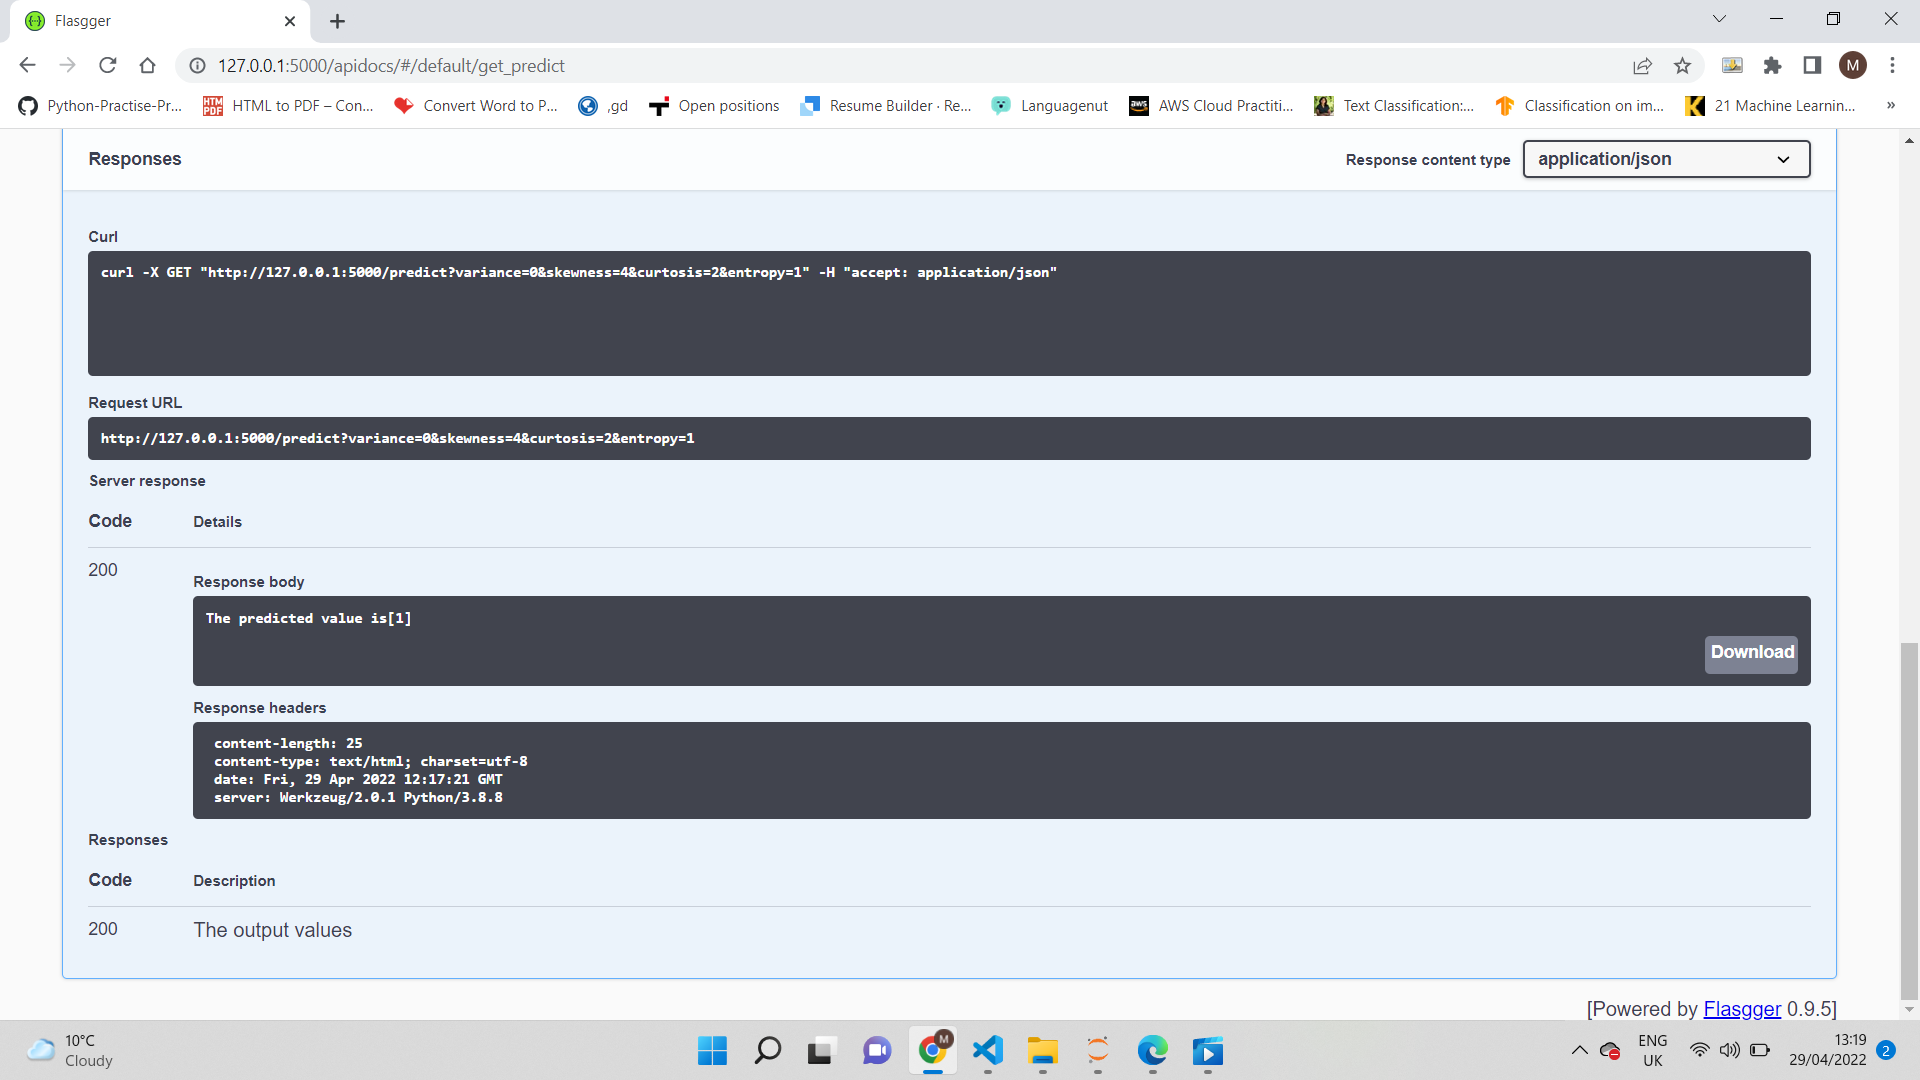